In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/PRITHVIRAJ KATTIMANI/Data_Analytics_portfolio/Projects/flagship-customer-churn-project/data/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
# Churn Differ by geography ?
geo_churn = df.groupby("Geography")["Exited"].mean().sort_values(ascending=False)
geo_churn

Geography
Germany    0.324432
Spain      0.166734
France     0.161548
Name: Exited, dtype: float64

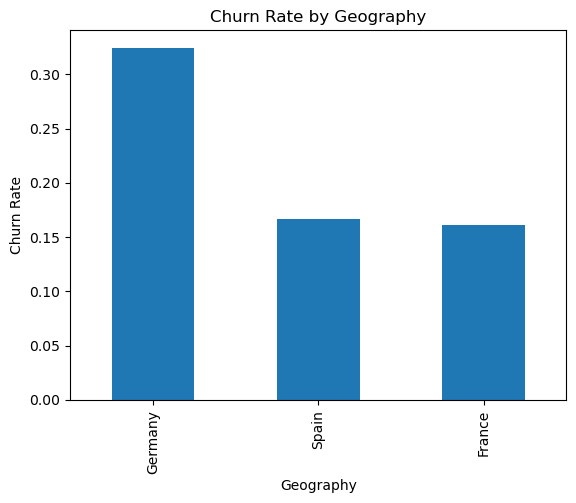

In [6]:
plt.figure()
geo_churn.plot(kind="bar")
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate")
plt.xlabel("Geography")
plt.show()

### Insight

**Germany** shows the highest churn rate (**~32%**).

This is almost **2× higher** than  
**Spain (~16%)** and **France (~16%)**.

This indicates a **region-specific retention problem**  
in Germany.


### Business Actions

- Investigate Germany-specific factors (pricing, service quality, product usage).

- Launch targeted retention campaigns for German customers.

- Prioritize customer support improvements in Germany to reduce churn.

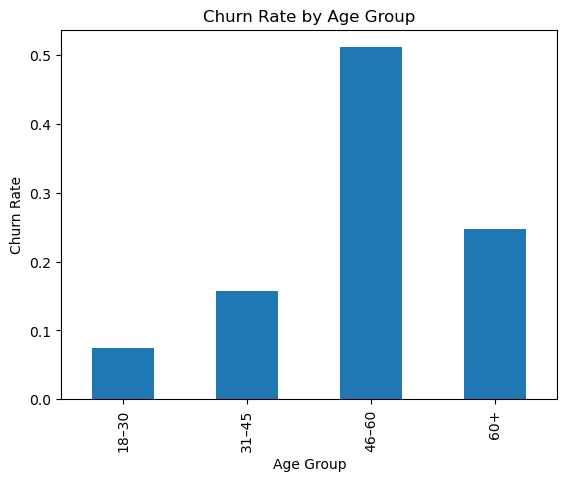

In [7]:
# Are older customers more likely to churn?
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18, 30, 45, 60, 100],
    labels=['18–30', '31–45', '46–60', '60+']
)

age_churn = df.groupby('AgeGroup', observed=False)['Exited'].mean()

plt.figure()
age_churn.plot(kind='bar')
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.show()

## Insight
- Churn increases with age.
- Customers aged 46+ show higher churn risk.

# Business Action
- Offer loyalty benefits for senior customers.

- Proactive support for older age groups.

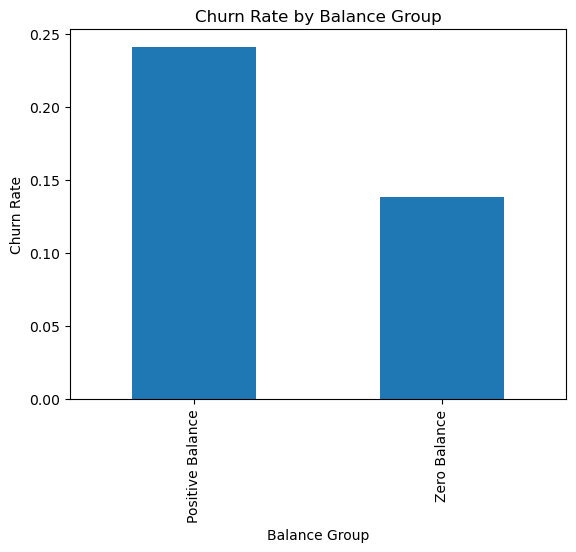

In [8]:
# Do high-balance customers churn more ? 
df['BalanceGroup'] = df['Balance'].apply(
    lambda x: 'Zero Balance' if x == 0 else 'Positive Balance'
)

balance_churn = df.groupby('BalanceGroup')['Exited'].mean()

plt.figure()
balance_churn.plot(kind='bar')
plt.title("Churn Rate by Balance Group")
plt.xlabel("Balance Group")
plt.ylabel("Churn Rate")
plt.show()

# Insight
- Customers with positive balances churn more than zero-balance customers, indicating dissatisfaction despite holding funds.

# Business Action
- Investigate fees, service issues, or trust problems for high-balance users.
- Offer relationship manager / premium support.
- Target high-balance churn prevention.

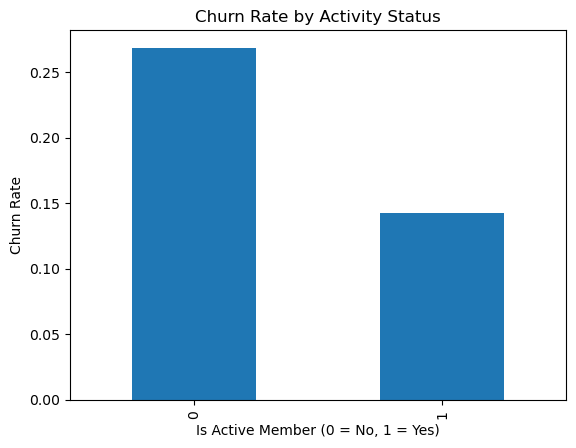

In [9]:
# Does customer activity reduce churn?
active_churn = df.groupby('IsActiveMember')['Exited'].mean()

plt.figure()
active_churn.plot(kind='bar')
plt.title("Churn Rate by Activity Status")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()

## Insight
- Inactive customers churn much more than active ones.

## Business Action
- Increase engagement via app notifications and offers.
- Monitor inactivity as an early churn signal.

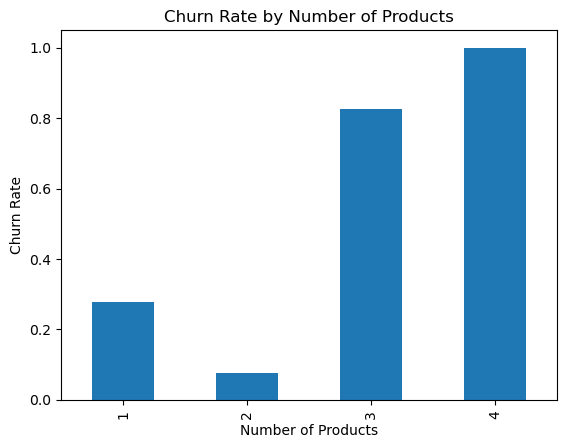

In [10]:
# Does owning more products reduce churn ?
product_churn = df.groupby('NumOfProducts')['Exited'].mean()

plt.figure()
product_churn.plot(kind='bar')
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate")
plt.show()

## Insight
- Customers with 2 products have the lowest churn, indicating optimal engagement. Extremely high churn for 3–4 products is likely due to small sample size.

### Business Action
- Move customers from 1 → 2 products.
- Be cautious interpreting 3–4 product churn.
- Validate with customer counts.

In [11]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64